In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box, Point
import pandas as pd

In [8]:
Country_data = gpd.read_file("./country/COUNTY_MOI_1090820.shp")
Country_data.head()

,COUNTYID,COUNTYCODE,COUNTYNAME,COUNTYENG,geometry
0,Z,09007,連江縣,Lienchiang County,"MULTIPOLYGON (((119.96445 25.94552, 119.96427 ..."
1,G,10002,宜蘭縣,Yilan County,"MULTIPOLYGON (((121.95971 24.84494, 121.96064 ..."
2,N,10007,彰化縣,Changhua County,"POLYGON ((120.45655 24.20719, 120.48589 24.197..."
3,M,10008,南投縣,Nantou County,"POLYGON ((121.27086 24.23661, 121.27108 24.236..."
4,P,10009,雲林縣,Yunlin County,"MULTIPOLYGON (((120.08108 23.52412, 120.08161 ..."


<AxesSubplot:>

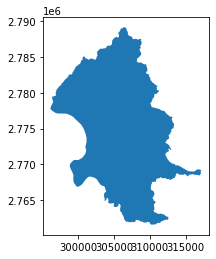

In [9]:
Country_data = Country_data.to_crs(epsg=3826)

Taipei = Country_data[(Country_data['COUNTYNAME']=='臺北市')]
Taipei.plot()

<AxesSubplot:>

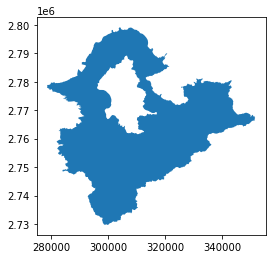

In [10]:
Country_data = Country_data.to_crs(epsg=3826)

New_Taipei = Country_data[(Country_data['COUNTYNAME']=='新北市')]
New_Taipei.plot()

In [11]:
def create_points(geometry, grid_size=100):
    envelope = geometry.envelope
    minx, miny, maxx, maxy = envelope.bounds
    
    cols = range(int(minx), int(maxx)+1, grid_size)
    rows = range(int(miny), int(maxy)+1, grid_size)
    
    points_list = []
    for x in cols:
        for y in rows:
            cell = box(x, y, x+grid_size, y+grid_size)
            if cell.intersects(geometry):
                points_list.append([x, y, x+grid_size, y+grid_size])

    return pd.DataFrame(points_list, columns=['minx', 'miny', 'maxx', 'maxy'])


In [15]:
points_taipei = Taipei['geometry'].apply(create_points)
points_taipei.to_csv("points_taipei.csv", index=False)

points_new_taipei = New_Taipei['geometry'].apply(create_points)
points_new_taipei.to_csv("points_new_taipei.csv", index=False)

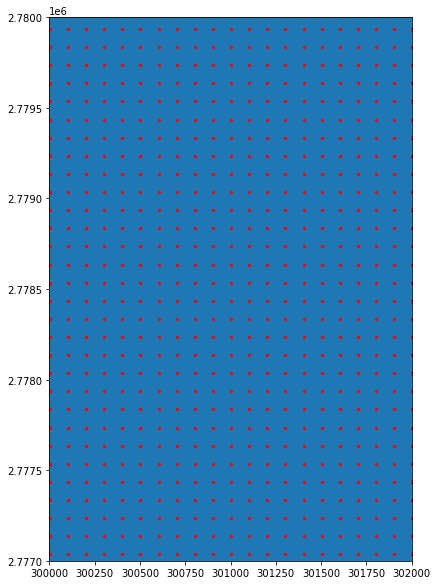

In [13]:
# test that the points are created correctly

df_points = pd.read_csv('points_taipei.csv')

geometry = [Point(xy) for xy in zip(df_points['x1'], df_points['y1'])]
geo_df_points = gpd.GeoDataFrame(df_points, geometry=geometry, crs='EPSG:3826')

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim([300000, 302000])
ax.set_ylim([2777000, 2780000])
Taipei.plot(ax=ax, edgecolor='black')

geo_df_points.plot(ax=ax, marker='o', color='red', markersize=5)
plt.show()
